In [1]:
import warnings

warnings.simplefilter(action = "ignore", category = FutureWarning)

import pandas as pd
import matplotlib.pyplot as plt   
import matplotlib.ticker as ticker
import numpy as np

import seaborn as sns
sns.set(color_codes=True)
np.random.seed(sum(map(ord, "distributions")))
from datetime import datetime


In [2]:
def getMonth(text):
    #get Month from column 'time'
    return text[3:]

def getYear(text):
    return int(text[6:])

In [3]:
df = pd.read_csv("vietnamnet.csv")
df

,id,cate,title,lead,time,tag
0,665581,Thời sự,Đề xuất cho người dân tự bán rác thải để có độ...,"Tổng thư ký Quốc hội Nguyễn Hạnh Phúc đề xuất,...",12-08-2020,"['Nguyễn Hạnh Phúc', 'rác thải', 'luật Bảo vệ ..."
1,667141,Thế giới,Bộ trưởng Nội vụ Philippines tái mắc Covid-19 ...,Bộ trưởng Nội vụ Philippines Eduardo Año xác n...,17-08-2020,"['virus corona', 'Philippines', 'COVID-19']"
2,667156,Sức khỏe,Điều dưỡng ở Đà Nẵng 5 lần xét nghiệm mới dươn...,Lần đầu tiên Việt Nam ghi nhận trường hợp bệnh...,17-08-2020,"['COVID-19', 'virus corona', 'xét nghiệm Covid..."
3,665531,Thời sự,Đề nghị quy định chặt chẽ hơn việc công nhận l...,"Bộ trưởng LĐ-TB-XH Đào Ngọc Dung cho biết, tro...",11-08-2020,"['đào ngọc dung', 'liệt sĩ']"
4,666207,Kinh Doanh,"Đối mặt khó khăn, Trung Quốc cảnh báo nguy cơ ...",Chủ tịch Trung Quốc Tập Cận Bình vừa đưa ra lờ...,17-08-2020,"['Trung Quốc', 'Donald Trump', 'COVID-19', 'an..."
...,...,...,...,...,...,...
1699,531071,Ô tô - Xe máy,Dàn xe triệu USD bất ngờ bốc cháy tại trường q...,Vụ hỏa hoạn bất ngờ xảy ra tại trường quay phi...,13-05-2019,"['xe cổ', 'xe hơi đăt tiền', 'siêu xe']"
1700,665755,Bạn đọc,Tặng 2 xe cấp cứu chuẩn châu Âu cho Trung tâm ...,"Ngày 11/8/2020, tiếp nối chuỗi hoạt động hưởng...",12-08-2020,"['dịch Covid-19', 'Trung tâm Cấp cứu 115']"
1701,663242,Bạn đọc,Bé Huyền My ở Quảng Trị được bạn đọc ủng hộ 84...,Huyền My đã mắc phải căn bệnh tim bẩm sinh cùn...,08-08-2020,"['bệnh tim bẩm sinh', 'quảng trị', 'hoàn cảnh ..."
1702,666641,Bạn đọc,Công ty Á Châu ủng hộ Đà Nẵng hơn 1000 lít Nan...,Công ty Cổ phần Ứng dụng công nghệ cao Á Châu ...,16-08-2020,"['nano bạc', 'COVID-19']"


In [4]:
df.dtypes

id        int64
cate     object
title    object
lead     object
time     object
tag      object
dtype: object

In [5]:
df['cate'].value_counts()

Ô tô - Xe máy    772
Thế giới         737
Kinh Doanh        82
Thời sự           63
Sức khỏe          16
Giáo dục          13
Bạn đọc            7
Bất động sản       5
Pháp luật          3
Giải trí           3
TuanVietNam        1
SOCIETY            1
Công nghệ          1
Name: cate, dtype: int64

In [6]:
df['month'] = df['time'].apply(getMonth)
df['year'] = df['time'].apply(getYear)
df
#Get Month and Year for analysing

,id,cate,title,lead,time,tag,month,year
0,665581,Thời sự,Đề xuất cho người dân tự bán rác thải để có độ...,"Tổng thư ký Quốc hội Nguyễn Hạnh Phúc đề xuất,...",12-08-2020,"['Nguyễn Hạnh Phúc', 'rác thải', 'luật Bảo vệ ...",08-2020,2020
1,667141,Thế giới,Bộ trưởng Nội vụ Philippines tái mắc Covid-19 ...,Bộ trưởng Nội vụ Philippines Eduardo Año xác n...,17-08-2020,"['virus corona', 'Philippines', 'COVID-19']",08-2020,2020
2,667156,Sức khỏe,Điều dưỡng ở Đà Nẵng 5 lần xét nghiệm mới dươn...,Lần đầu tiên Việt Nam ghi nhận trường hợp bệnh...,17-08-2020,"['COVID-19', 'virus corona', 'xét nghiệm Covid...",08-2020,2020
3,665531,Thời sự,Đề nghị quy định chặt chẽ hơn việc công nhận l...,"Bộ trưởng LĐ-TB-XH Đào Ngọc Dung cho biết, tro...",11-08-2020,"['đào ngọc dung', 'liệt sĩ']",08-2020,2020
4,666207,Kinh Doanh,"Đối mặt khó khăn, Trung Quốc cảnh báo nguy cơ ...",Chủ tịch Trung Quốc Tập Cận Bình vừa đưa ra lờ...,17-08-2020,"['Trung Quốc', 'Donald Trump', 'COVID-19', 'an...",08-2020,2020
...,...,...,...,...,...,...,...,...
1699,531071,Ô tô - Xe máy,Dàn xe triệu USD bất ngờ bốc cháy tại trường q...,Vụ hỏa hoạn bất ngờ xảy ra tại trường quay phi...,13-05-2019,"['xe cổ', 'xe hơi đăt tiền', 'siêu xe']",05-2019,2019
1700,665755,Bạn đọc,Tặng 2 xe cấp cứu chuẩn châu Âu cho Trung tâm ...,"Ngày 11/8/2020, tiếp nối chuỗi hoạt động hưởng...",12-08-2020,"['dịch Covid-19', 'Trung tâm Cấp cứu 115']",08-2020,2020
1701,663242,Bạn đọc,Bé Huyền My ở Quảng Trị được bạn đọc ủng hộ 84...,Huyền My đã mắc phải căn bệnh tim bẩm sinh cùn...,08-08-2020,"['bệnh tim bẩm sinh', 'quảng trị', 'hoàn cảnh ...",08-2020,2020
1702,666641,Bạn đọc,Công ty Á Châu ủng hộ Đà Nẵng hơn 1000 lít Nan...,Công ty Cổ phần Ứng dụng công nghệ cao Á Châu ...,16-08-2020,"['nano bạc', 'COVID-19']",08-2020,2020


In [7]:
data = pd.DataFrame(df, columns = ['id', 'cate', 'title', 'lead', 'time', 'tag', 'month'])

In [8]:
df['month'].value_counts()
# Get the statistic of the month when the post published

03-2019    228
04-2019    159
03-2020    138
01-2019    135
02-2020    112
06-2019    105
05-2019     97
07-2019     84
01-2020     70
07-2020     68
02-2019     67
08-2019     62
08-2020     61
12-2019     59
05-2020     58
11-2019     45
09-2019     42
06-2020     39
10-2019     37
04-2020     37
12-2018      1
Name: month, dtype: int64

In [9]:
df.describe()

,id,year
count,1704.000000,1704.000000
mean,568354.408451,2019.341549
std,53097.639616,0.475605
min,498844.000000,2018.000000
25%,517305.000000,2019.000000
50%,549508.000000,2019.000000
75%,618249.250000,2020.000000
max,667171.000000,2020.000000


In [10]:
year = df['year'].value_counts()
year

2019    1120
2020     583
2018       1
Name: year, dtype: int64

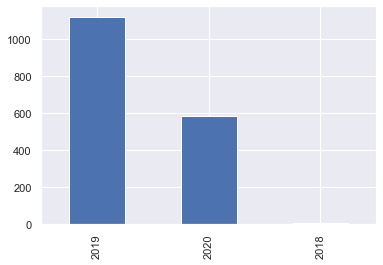

In [11]:
df['year'].value_counts().plot.bar()
#Draw plot bar of df['year'] using pandas

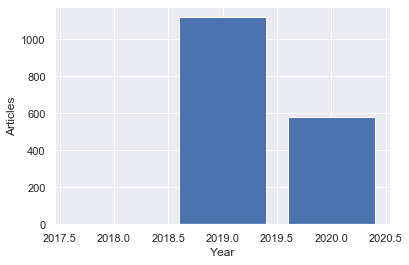

In [12]:
year_key = year.keys()
year_value = [year[x] for x in year_key]

plt.xlabel("Year")
plt.ylabel("Articles")
plt.bar(year_key, year_value)
plt.show()
#Trying to draw a plot bar of df['year'] using matplotlib

In [13]:
"""fig, ax = plt.subplots()

plt.xlabel('Month')
plt.xticks(rotation=45)
plt.xticks(year)

formatter = ticker.FormatStrFormatter('$%.0f')     
ax.yaxis.set_major_formatter(formatter)

plt.ylabel('Price')           
plt.suptitle('Mike Trout Yearly Cost Per Home Run')
plt.bar(year, cost_per_home_run)
plt.show()""" 

"fig, ax = plt.subplots()\n\nplt.xlabel('Month')\nplt.xticks(rotation=45)\nplt.xticks(year)\n\nformatter = ticker.FormatStrFormatter('$%.0f')     \nax.yaxis.set_major_formatter(formatter)\n\nplt.ylabel('Price')           \nplt.suptitle('Mike Trout Yearly Cost Per Home Run')\nplt.bar(year, cost_per_home_run)\nplt.show()"